In [106]:
from utils import *

In [107]:
import pandas as pd
reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')

df_comments = reviews.loc[:, ['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
print(f'Dataset shape: {df_comments.shape}')
df_comments.columns = ['score', 'comment']
df_comments.head()

Dataset shape: (41753, 2)


score                                            comment
0      5              Recebi bem antes do prazo estipulado.
1      5  Parabéns lojas lannister adorei comprar pela I...
2      4  aparelho eficiente. no site a marca do aparelh...
3      4    Mas um pouco ,travando...pelo valor ta Boa.\r\n
4      5  Vendedor confiável, produto ok e entrega antes...

In [108]:
# # Nlp
# import nltk
# # Wordcloud
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# def plot_wordcloud(text, stopwords, mask=None, max_words=200, max_font_size=100,
#                    title=None, title_size=40, image_color=False):
#
#     figure_size = (24, 16)
#     wordcloud = WordCloud(background_color='black',
#                     stopwords = stopwords,
#                     max_words = max_words,
#                     max_font_size = max_font_size,
#                     random_state = 42,
#                     width=1200,
#                     height=300,
#                     mask = mask)
#     wordcloud.generate(str(text))
#
#     plt.figure(figsize=figure_size)
#     plt.imshow(wordcloud);
#     plt.title(title, fontdict={'size': title_size, 'color': 'black',
#                                   'verticalalignment': 'bottom'})
#     plt.axis('off');
#     plt.tight_layout()
#
# stopwords = nltk.corpus.stopwords.words('portuguese')
# comments = reviews.review_comment_message.values
# plot_wordcloud(comments, stopwords, title="")

In [109]:
# import seaborn as sns
#
#
# length = [len(text) for text in comments]
# num_letters = [len(re.findall(r'[a-zA-Z]', text)) for text in comments]
# num_commas = [text.count(',') for text in comments]
# num_dots = [text.count('.') for text in comments]
#
# fig, axis = plt.subplots(1, 2, figsize=(12,4))
# pl0 = sns.kdeplot(length, color='navy', label='Review length', ax=axis[0])
# pl1 = sns.kdeplot(num_letters, color='orange', label='Number of letters', ax=axis[0])
# pl2 = sns.kdeplot(num_dots, color='navy', label='Number of dots', ax=axis[1])
# pl3 = sns.kdeplot(num_commas, color='orange', label='Number of commas', ax=axis[1])
#

In [110]:
import re

def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]
# Creating a list of comment reviews
reviews = list(df_comments['comment'].values)

# Applying RegEx
reviews_breakline = re_breakline(reviews)
df_comments['re_breakline'] = reviews_breakline

# Verifying results
print_step_result(reviews, reviews_breakline, idx_list=[48])


Original text: Estava faltando apenas um produto, eu recebi hoje , muito obrigada!
Tudo certo!

Att 

Elenice.
Processed text: Estava faltando apenas um produto, eu recebi hoje , muito obrigada!  Tudo certo!    Att     Elenice.


In [111]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]
# Applying RegEx
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

# Verifying results
print_step_result(reviews_breakline, reviews_hiperlinks, idx_list=[10796, 12782])


Original text: comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/
Processed text: comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto  link  quando o produto chegou aqui veio todos com a mesma cor, tabaco  link 

Original text: Pedi esse: https://www.lannister.com.br/produto/22880118/botox-capilar-selafix-argan-premium-doux-clair-2x1-litro?pfm_carac=doux%20clair&pfm_index=3&pfm_page=search&pfm_pos=grid&pfm_type=search_page%
Processed text: Pedi esse:  link 


In [112]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]
# Applying RegEx
reviews_money = re_money(reviews_hiperlinks)
df_comments['re_money'] = reviews_money

# Verifying results
print_step_result(reviews, reviews_money, idx_list=[26020, 33297, 32998])


Original text: Recebi o produto correto, porém o valor do produto na NF ficou a menor, R$ 172,00 sendo que comprei a 219,90.
O valor do frete calculado foi R$ 18,90 e veio R$ 93,00.
Gostaria que viesse com correto
Processed text: Recebi o produto correto, porém o valor do produto na NF ficou a menor,  dinheiro  sendo que comprei a 219,90.  O valor do frete calculado foi  dinheiro  e veio  dinheiro .  Gostaria que viesse com correto

Original text: Paguei $48,00 reais de frete e acabei tendo que buscar o pedido no Centro de Distribuição dos Correios, porém a loja nada tem a ver com o mal serviço prestado pela empresa contrata para entrega.
Processed text: Paguei  dinheiro  reais de frete e acabei tendo que buscar o pedido no Centro de Distribuição dos Correios, porém a loja nada tem a ver com o mal serviço prestado pela empresa contrata para entrega.

Original text: Infelizmente, para uma entrega em GRU (Região Metropolitana da Grande SP) achei bem "salgado" o valor do frete cobrado so

In [113]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]
# Applying RegEx
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers

# Verifying results
print_step_result(reviews_money, reviews_numbers, idx_list=[68])


Original text: Comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.
Processed text: Comprei o produto dia  numero  de fevereiro e hoje dia  numero  de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.


In [114]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print_step_result(reviews_numbers, reviews_negation, idx_list=[4783, 4627, 4856, 4904])


Original text: Meu pedido era para ser entregue até dia  numero / numero / numero , até a presente data ( numero / numero ) a nota fiscal não foi emitida, solicitei várias vezes não obtive retorno, não recomendo esta Loja, nem a lannister!!!!!!
Processed text: Meu pedido era para ser entregue até dia  numero / numero / numero , até a presente data ( numero / numero ) a nota fiscal  negação  foi emitida, solicitei várias vezes  negação  obtive retorno,  negação  recomendo esta Loja, nem a lannister!!!!!!

Original text: O material é bom, o problema é que a bolsa não fecha, não possui zíper, é como uma sacola. Isso me deixou insatisfeita, pois na foto não dá pra perceber e não há informação ou foto interna sobre isso.
Processed text: O material é bom, o problema é que a bolsa  negação  fecha,  negação  possui zíper, é como uma sacola. Isso me deixou insatisfeita, pois na foto  negação  dá pra perceber e  negação  há informação ou foto interna sobre isso.

Original text: OEQUIPAMENTO NÃO

In [115]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]

# Applying RegEx
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars

# Verifying results
print_step_result(reviews_negation, reviews_special_chars, idx_list=[45, 135, 234])


Original text: Este foi o pedido  Balde Com  numero  Peças - Blocos De Montar  numero  un -  dinheiro  cada ( negação  FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un -  dinheiro  (ESTE FOI ENTREG
Processed text: Este foi o pedido  Balde Com  numero  Peças   Blocos De Montar  numero  un    dinheiro  cada   negação  FOI ENTREGUE   Vendido e entregue targaryen  Tapete de Eva Nº Letras  numero  Peças Crianças  numero  un    dinheiro   ESTE FOI ENTREG

Original text: Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes 👏👏👏👏?
Processed text: Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes      

Original text: Comprei o produto, paguei no boleto e só recebi metade do produto, anunciaram uma coisa é mandaram outra. Muito insatisfeita 😡😡😡
Processed text: Comprei o produto  paguei no boleto e só recebi metade do produto  anunciaram uma coisa é mandaram outra  Muito ins

In [116]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """

    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces

# Verifying results
print_step_result(reviews_special_chars, reviews_whitespaces, idx_list=[3, 4, -1])


Original text: Mas um pouco  travando   pelo valor ta Boa   
Processed text: Mas um pouco travando pelo valor ta Boa

Original text: Vendedor confiável  produto ok e entrega antes do prazo 
Processed text: Vendedor confiável produto ok e entrega antes do prazo


In [117]:
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [118]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """

    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]
# Removing stopwords and looking at some examples
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
df_comments['stopwords_removed'] = reviews_stopwords

print_step_result(reviews_whitespaces, reviews_stopwords, idx_list=[0, 45, 500])


Original text: Recebi bem antes do prazo estipulado
Processed text: recebi bem antes prazo estipulado

Original text: Este foi o pedido Balde Com numero Peças Blocos De Montar numero un dinheiro cada negação FOI ENTREGUE Vendido e entregue targaryen Tapete de Eva Nº Letras numero Peças Crianças numero un dinheiro ESTE FOI ENTREG
Processed text: pedido balde numero peças blocos montar numero un dinheiro cada negação entregue vendido entregue targaryen tapete eva nº letras numero peças crianças numero un dinheiro entreg

Original text: O produto negação é bom
Processed text: produto negação bom


In [119]:
def CorrectSpelling(text_list):
    mistakes_dict = {
        'decpcionou': 'decepcionou', 'tô': 'estou', 'to': 'estou',
        'q': 'que', 'pq': 'porque', 'mt': 'muito', 'muiiita': 'muita',
        'estaav': 'estava', 'acabento': 'acabamento', 'orrivel': 'horrível',
        'sertões': 'certos', 'vcs': 'vocês', 'msg': 'mensagem', 'dta': 'data',
        'ñ': 'não', 'n': 'não', 'grates': 'grátis', 'testa-lo': 'testar',
        'superandoo': 'superando', 'atentimento': 'atendimento',
        'cancelacem': 'cancelassem', 'msm': 'mesmo', 'protudo': 'produto',
        'decrarar': 'declarar', 'trasporte': 'transporte', 'decpsionei': 'decepcionei',
        'empuerada': 'empoeirada', 'recebie': 'recebi', 'superr': 'super',
        'nao': 'não', 'mto': 'muito', 'tb': 'também', 'execelente': 'excelente',
        'tao': 'tão', 'blz': 'beleza'
    }
    return [[mistakes_dict[tk] if tk in mistakes_dict else tk for tk in tokens]
           for tokens in text_list]
text_list = [['decpcionou', 'tô', 'estaav'], ['acabento', 'orrivel', 'vcs']]
corrected_text_list = CorrectSpelling(text_list)
print(corrected_text_list)

[['decepcionou', 'estou', 'estava'], ['acabamento', 'horrível', 'vocês']]


In [120]:
# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hiperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces,
    # 'correct_spelling': CorrectSpelling
}
from nltk.stem.snowball import SnowballStemmer

# Building the Pipeline
text_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer())),
    # ('text_features', TextFeatureExtraction(vectorizer)),
])
from sklearn.cluster import KMeans
data = text_pipeline.fit_transform(reviews)
print(data[:3])
stemmer = SnowballStemmer("portuguese")
# Defining the vectorizer to extract features from text
vectorizer = TfidfVectorizer(max_features=300, stop_words=pt_stopwords,tokenizer=lambda x: [stemmer.stem(word) for word in x.split()])
text_feature_extraction = TextFeatureExtraction(vectorizer)
ndata = text_feature_extraction.fit_transform(data)
print(ndata[:3])

['receb bem ant praz estipul', 'parabém loj lannist ador compr internet segur prát parabém tod feliz pásco', 'aparelh efici sit marc aparelh impress numer desinfec cheg outr nom atual marc corret vez aparelh']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.35201845 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.42800798 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

C:\Users\xy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:284: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivéss', 'estáv', 'estã', 'fom', 'form', 'foss', 'fôr', 'fôss', 'haj', 'hav', 'houv', 'houvéss', 'hã', 'mesm', 'minh', 'muit', 'noss', 'nã', 'par', 'pel', 'quand', 'sej', 'serã', 'som', 'sã', 'tenh', 'ter', 'terã', 'tev', 'tinh', 'tiv', 'tivéss', 'tính', 'voc', 'éram'] not in stop_words.
  warnings.warn(


In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
def data_pca(data):
    # 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(ndata)

    # 创建PCA模型并拟合数据
    pca = PCA(n_components=2)  # 设置要保留的主成分数量
    X_pca = pca.fit_transform(X_scaled)
    print(X_pca)
    return X_pca
pca_data = data_pca(ndata)

[[-2.53025447  2.62527997]
 [-0.61516653 -0.37923888]
 [ 0.63809246 -0.55259596]
 ...
 [-1.76255907 -0.76946595]
 [ 2.41952456 -2.12413294]
 [ 2.49821442  0.43403715]]


In [122]:
def cluster_score(data,clusters):
    # 计算聚类效果的轮廓系数
    score = silhouette_score(data, clusters)
    print("轮廓系数为：", score)
    # 计算Calinski-Harabasz Score
    score_ch = calinski_harabasz_score(data, clusters)
    print("Calinski-Harabasz Score为：", score_ch)
    # 计算Davies-Bouldin Score
    score_db = davies_bouldin_score(data, clusters)
    print("Davies-Bouldin Score为：", score_db)
def result_to_csv(df, labels, is_dl, model_name):
    df_model = pd.DataFrame()
    df_model['comment'] = df['comment']
    df_model['cluster'] = labels
    path_dl = ''
    if is_dl:path_dl = 'dl'
    else:path_dl = 'non-dl'
    df_model.to_csv('data/result/'+path_dl+'/'+ model_name+'_result.csv', index=False)
    return df_model
def cluster_wordcloud(df, is_dl, model_name, n_cluster):
    from wordcloud import WordCloud
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import matplotlib.pyplot as plt
    stopwords = set(stopwords.words('portuguese'))
    for i in range(0, n_cluster):
        # 筛选出 cluster 列等于 i 的所有行
        filtered_df = df[df['cluster'] == i]
        # 获取 comment 列的值作为列表
        comments = filtered_df['comment'].tolist()
        print(comments[:3])
        text = ' '.join(comments)
        # 分词
        tokens = word_tokenize(text, language='portuguese')
        # 去除停用词
        tokens = [token for token in tokens if token.lower() not in stopwords]
        # 将分词结果拼接成一个字符串
        processed_text = ' '.join(tokens)
        # 创建词云对象
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)
        # 绘制词云图
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud')
        if is_dl:path_dl = 'dl'
        else:path_dl = 'non-dl'
        plt.savefig('pics/'+path_dl+'/'+model_name+'/'+'wordcloud'+str(i))
        plt.show()

def cluster_model(model, data, pre_data, df, is_dl, model_name):

    model.fit(data)
    if(model_name=='dbscan'):
        clusters = model.labels_
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    else:
        clusters = model.predict(data)
        n_clusters = 5
    data_clusters = pd.DataFrame({'text': pre_data, 'cluster': clusters})
    print(data_clusters.head())
    cluster_score(data,clusters)
    # 将簇标签作为一列添加到原始数据中
    # labels = model.labels_
    df_model = result_to_csv(df, clusters, is_dl, model_name)
    draw_scatter(data, clusters, n_clusters, is_dl, model_name)
    cluster_wordcloud(df_model, is_dl, model_name, n_clusters)
def draw_scatter(data ,labels, n_cluster, is_dl, model_name):
    colors = ['red', 'green', 'blue', 'yellow', 'purple']
    markers = ['o', '*', '+', '^', 's']

    for label in range(n_cluster):
        x = data[ labels == label]
        plt.scatter(x[:, 0], x[:, 1], c=colors[label], marker=markers[label], label='label{}'.format(label))

    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(loc=4)
    if is_dl:path_dl = 'dl'
    else:path_dl = 'non-dl'
    plt.savefig('pics/'+path_dl+'/'+model_name+'/'+'scatter')
    plt.show()

                                                text  cluster
0                         receb bem ant praz estipul        3
1  parabém loj lannist ador compr internet segur ...        1
2  aparelh efici sit marc aparelh impress numer d...        0
3                               pouc trav val ta boa        2
4               vend confi produt ok entreg ant praz        3
轮廓系数为： 0.43571693321569904
Calinski-Harabasz Score为： 38735.52305247677
Davies-Bouldin Score为： 0.823169785378763
['aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho', 'GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU', 'A compra foi realizada facilmente.\r\nA entrega foi efetuada muito antes do prazo dado.\r\nO produto já começou a ser usado e até o presente,\r\nsem problemas.']
['Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos fe

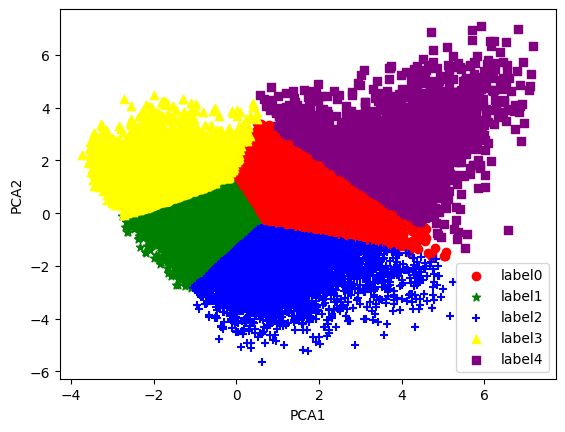

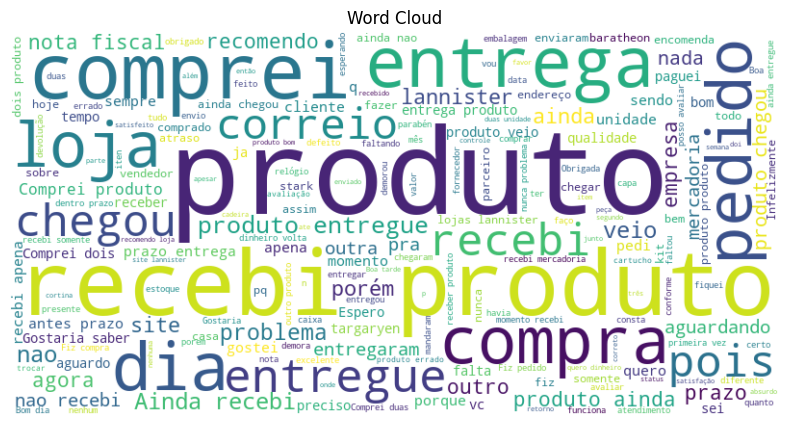

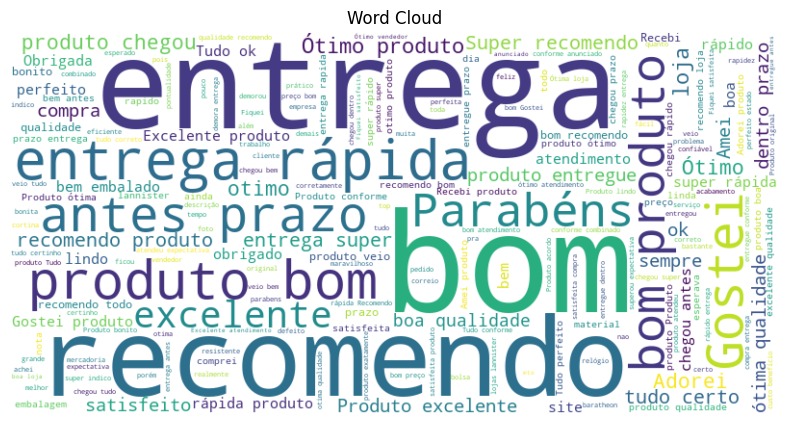

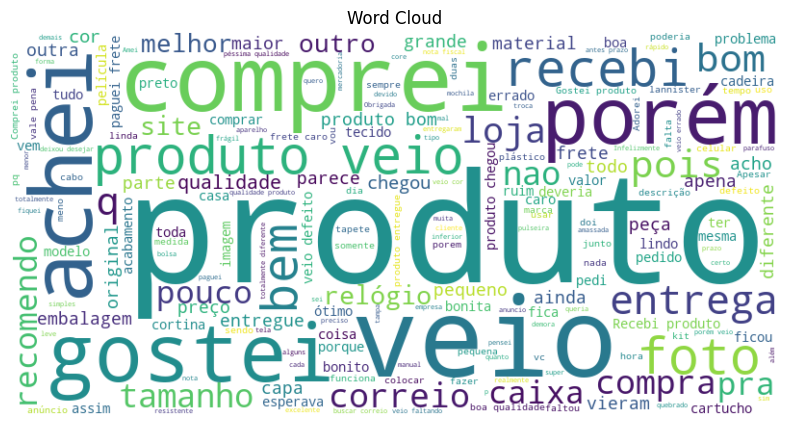

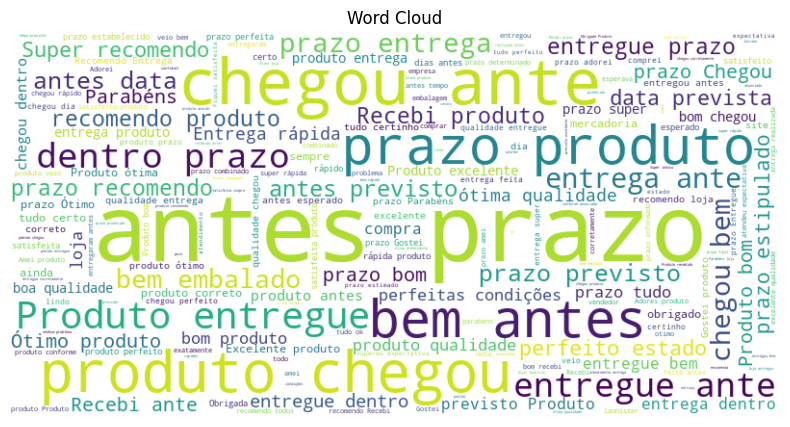

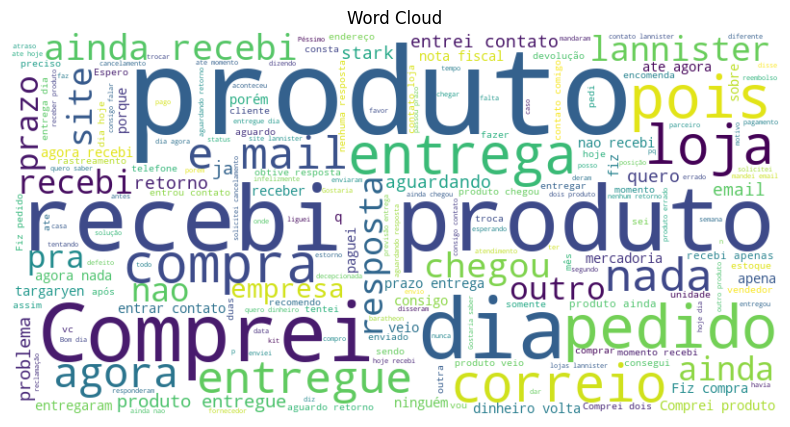

In [123]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# 使用KMeans算法对文本数据进行聚类
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_model(kmeans,pca_data,data, df_comments, False ,'kmeans')

In [124]:
# 使用bert进行encode
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')
data_embeddings = embedder.encode(data)

embed_pca_data = data_pca(data_embeddings)

[[-2.52300504  2.46330923]
 [-0.61296669 -0.16017345]
 [ 0.66327757 -0.79204973]
 ...
 [-1.78194975 -0.71860356]
 [ 2.42947191 -2.44416378]
 [ 2.50611155  0.39457804]]


                                                text  cluster
0                         receb bem ant praz estipul        2
1  parabém loj lannist ador compr internet segur ...        0
2  aparelh efici sit marc aparelh impress numer d...        4
3                               pouc trav val ta boa        4
4               vend confi produt ok entreg ant praz        2
轮廓系数为： 0.4355059427398811
Calinski-Harabasz Score为： 38418.027153100054
Davies-Bouldin Score为： 0.8228015736587777
['Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa', 'Péssimo', 'Loja nota 10']
['Pedi reembolso e sem resposta até momento ', 'Comprei dois lustres pendentes, com a parceira targaryen e só me enviaram um lustre. Abri reclamação, mas ainda não recebi resposta. Aguardo solução por parte de Lojas lannister.', 'aqui está descrevendo como entregue só que ate agora não recebi']
['Recebi bem antes do prazo estipulado.', 'Vendedor confiável, produto ok e entrega ant

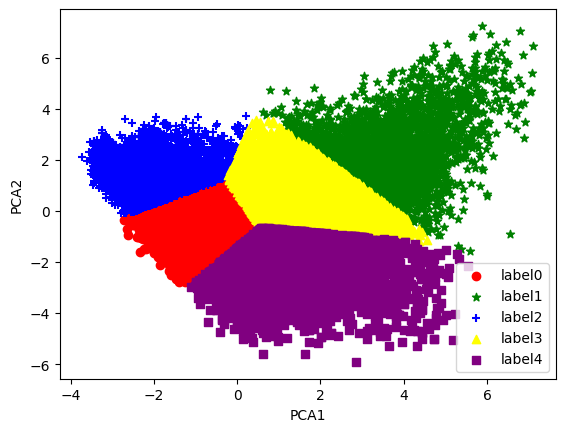

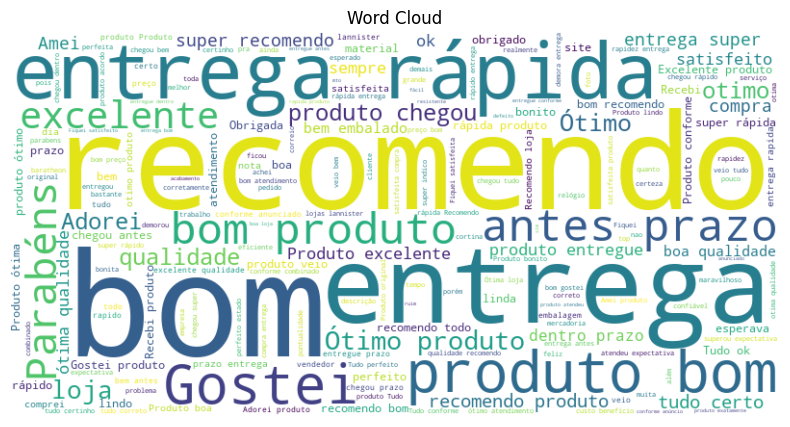

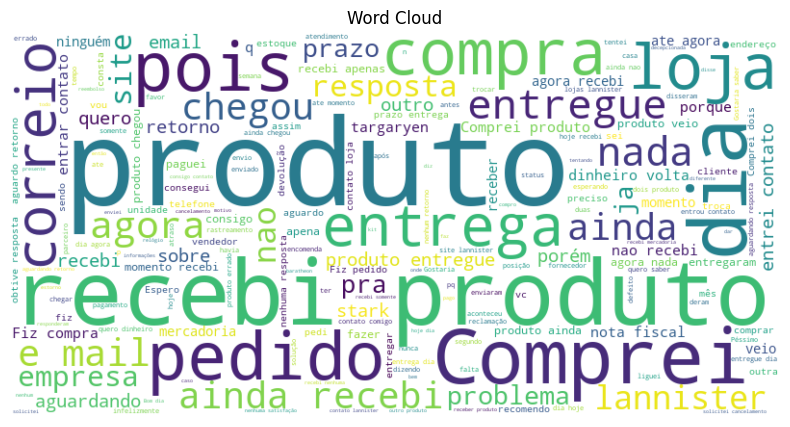

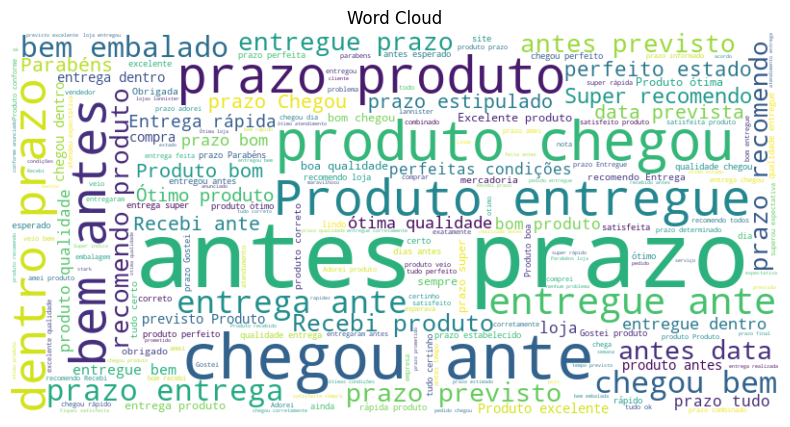

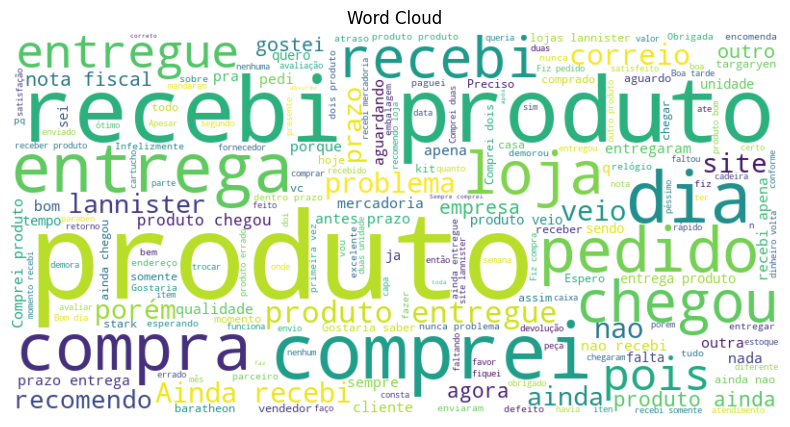

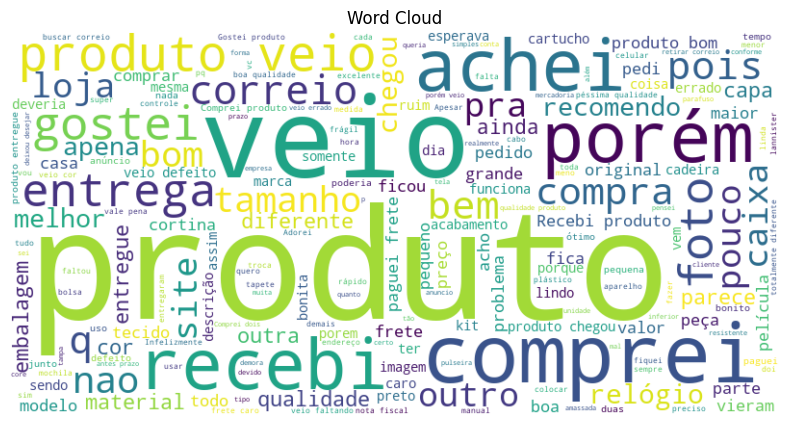

In [125]:
cluster_model(kmeans,embed_pca_data,data, df_comments, True ,'kmeans')

                                                text  cluster
0                         receb bem ant praz estipul        3
1  parabém loj lannist ador compr internet segur ...        4
2  aparelh efici sit marc aparelh impress numer d...        0
3                               pouc trav val ta boa        0
4               vend confi produt ok entreg ant praz        3
轮廓系数为： 0.33493799627216175
Calinski-Harabasz Score为： 25651.24911010187
Davies-Bouldin Score为： 0.9057461780741155
['aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho', 'Mas um pouco ,travando...pelo valor ta Boa.\r\n', 'Péssimo']
['Pedi reembolso e sem resposta até momento ', 'Comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.', 'Comprei dois lustres pendentes, com

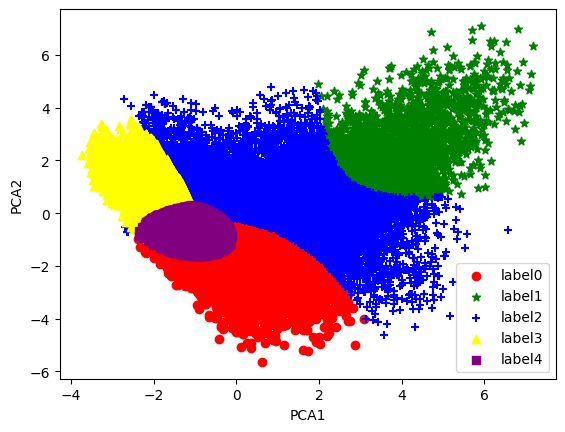

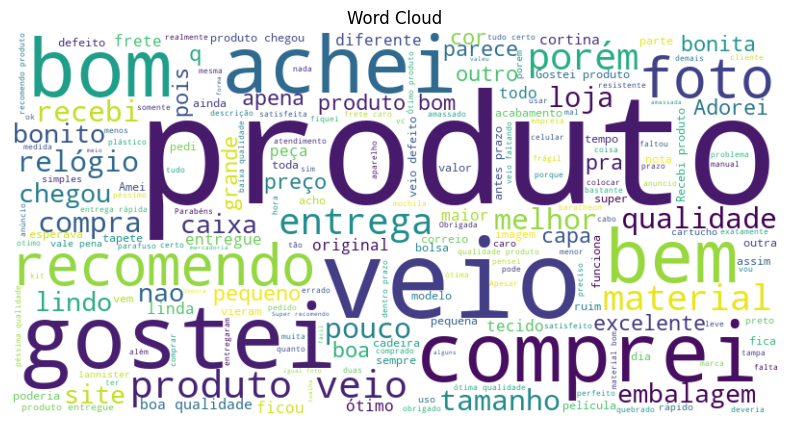

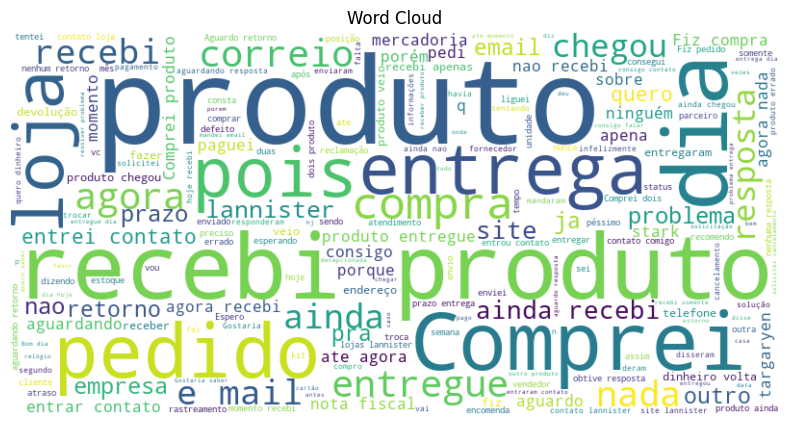

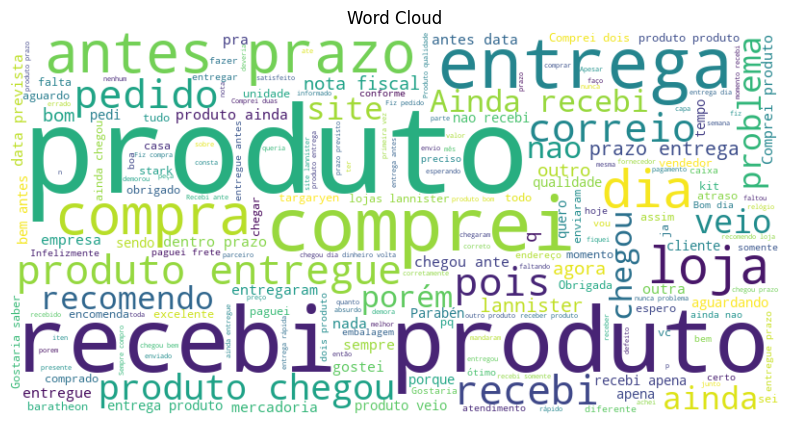

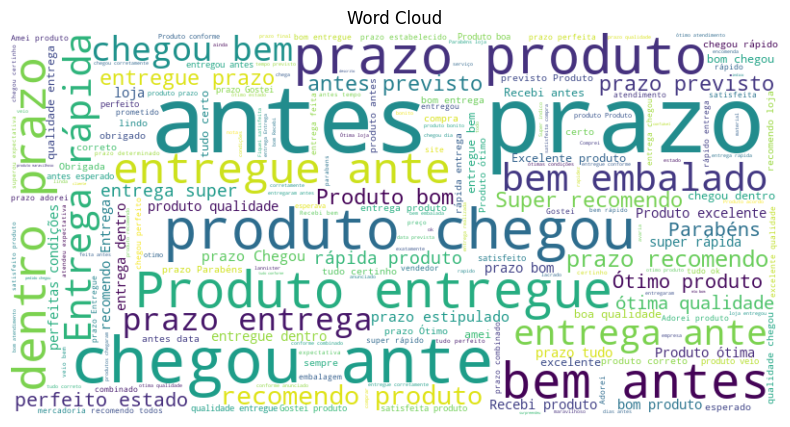

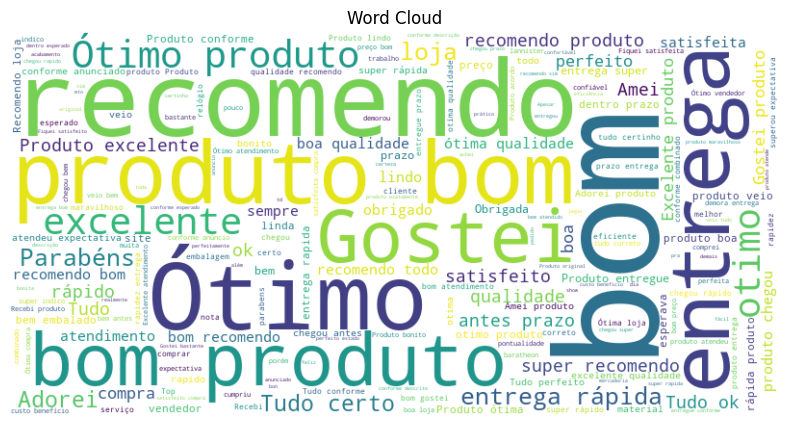

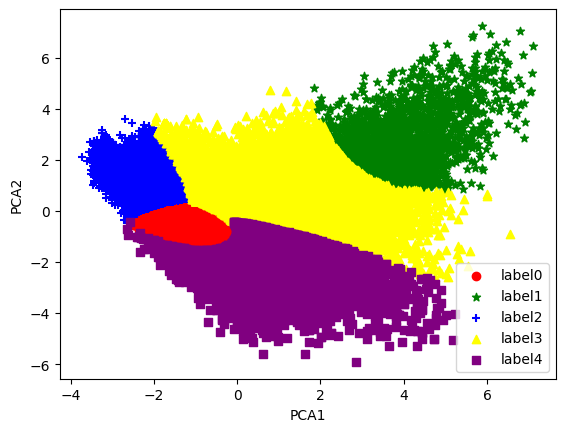

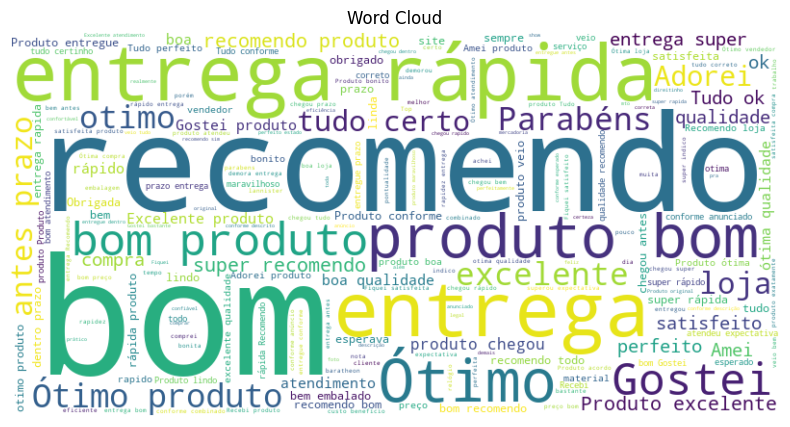

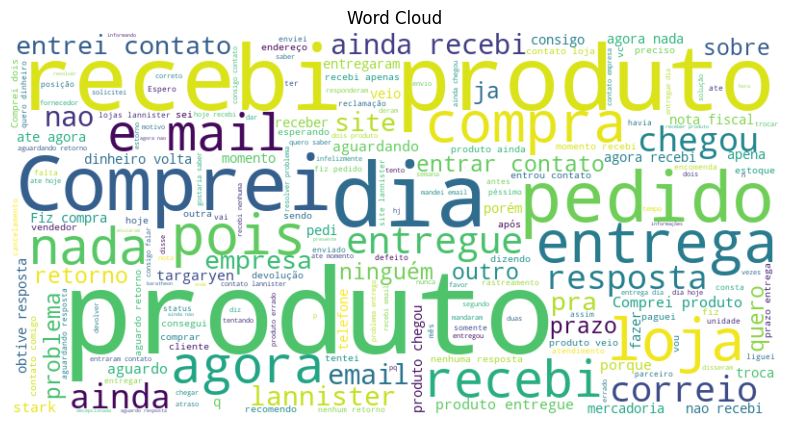

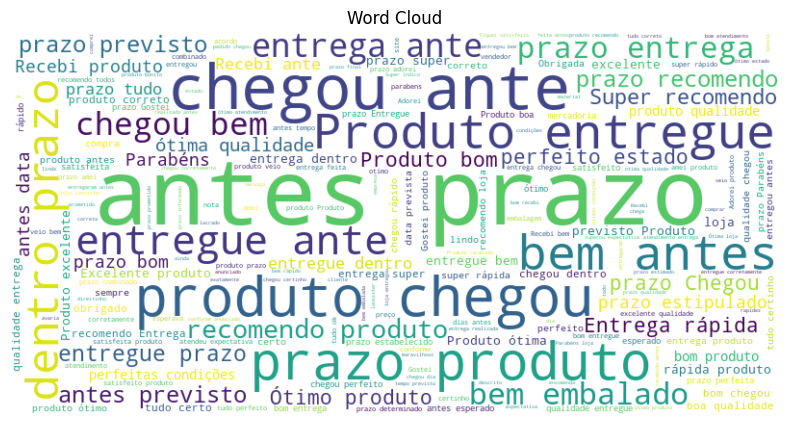

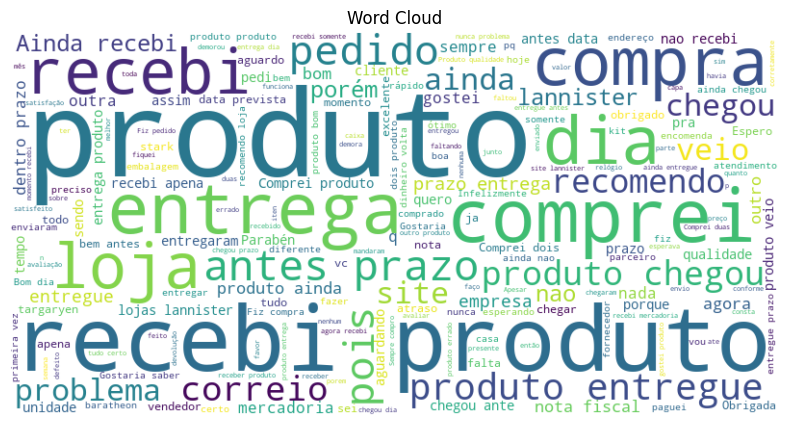

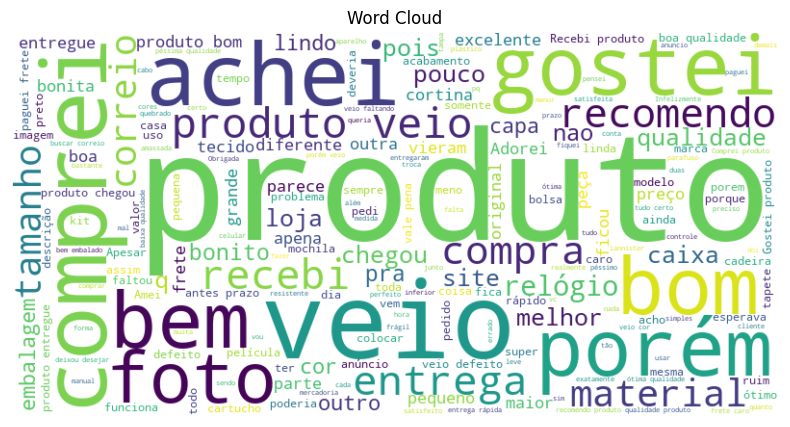

In [126]:
from sklearn.mixture import GaussianMixture
# 使用高斯混合模型聚类算法对文本数据进行聚类
gmm = GaussianMixture(n_components=5, random_state=42)
cluster_model(gmm,pca_data,data, df_comments, False ,'gmm')
cluster_model(gmm,embed_pca_data,data, df_comments, True ,'gmm')

                                                text  cluster
0                         receb bem ant praz estipul        0
1  parabém loj lannist ador compr internet segur ...        0
2  aparelh efici sit marc aparelh impress numer d...        0
3                               pouc trav val ta boa        0
4               vend confi produt ok entreg ant praz        0
轮廓系数为： 0.6014614590357485
Calinski-Harabasz Score为： 32.38662123169026
Davies-Bouldin Score为： 1.5713681086551634
['Recebi bem antes do prazo estipulado.', 'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa', 'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho']


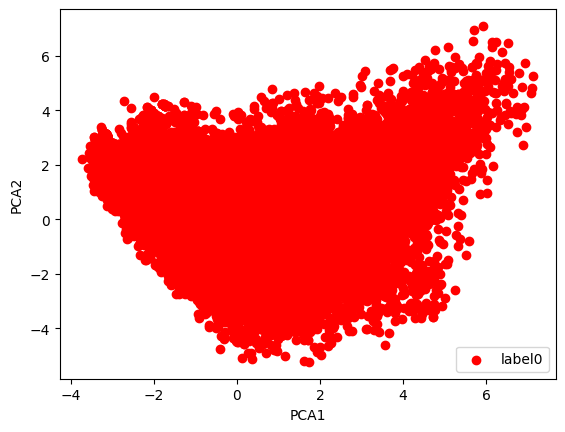

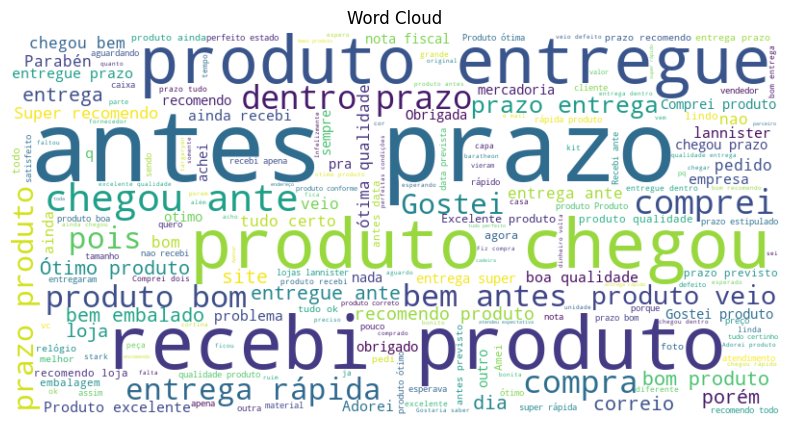

In [135]:
from sklearn.cluster import DBSCAN
# 使用DBSCAN算法对文本数据进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=2)
cluster_model(dbscan,pca_data,data, df_comments, False ,'dbscan')

                                                text  cluster
0                         receb bem ant praz estipul        0
1  parabém loj lannist ador compr internet segur ...        0
2  aparelh efici sit marc aparelh impress numer d...        0
3                               pouc trav val ta boa        0
4               vend confi produt ok entreg ant praz        0
轮廓系数为： 0.5967296465527495
Calinski-Harabasz Score为： 13.79168030860875
Davies-Bouldin Score为： 1.6829376323749727
['Recebi bem antes do prazo estipulado.', 'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa', 'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho']


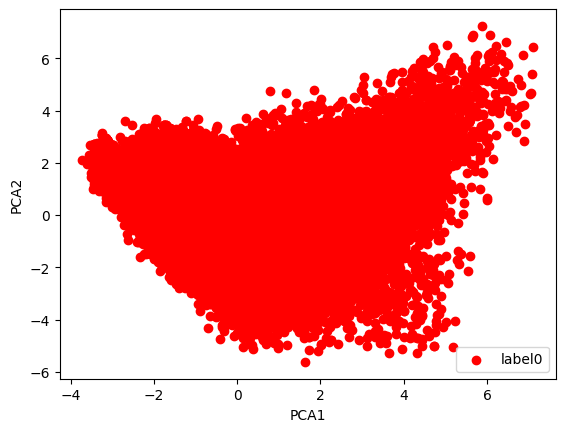

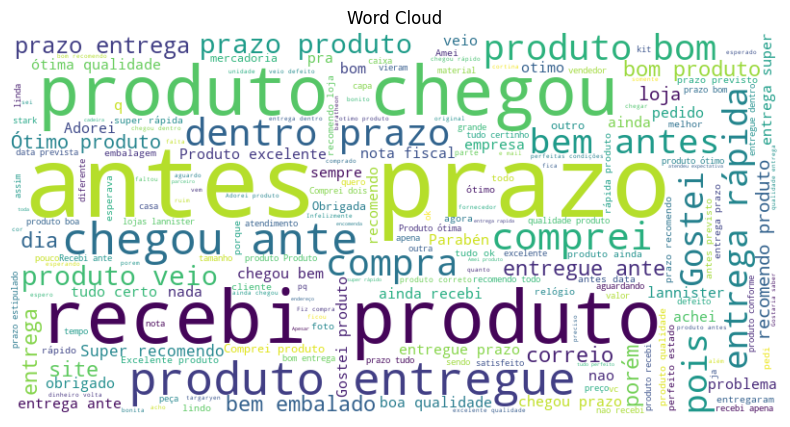

In [128]:
cluster_model(dbscan,embed_pca_data,data, df_comments, True ,'dbscan')

In [129]:
# from sklearn.cluster import DBSCAN
# # 使用DBSCAN算法对文本数据进行聚类
# dbscan_cluster = DBSCAN(eps=0.5, min_samples=2)
# dbscan_cluster.fit(ndata)
#
# # 输出聚类结果
# clusters = dbscan_cluster.labels_
# data_clusters = pd.DataFrame({'text': data, 'cluster': clusters})
# print(data_clusters[:10])
# #02
# # 计算聚类效果的轮廓系数
# score = silhouette_score(ndata, clusters)
# print("轮廓系数为：", score)
# # 计算Calinski-Harabasz Score
# score_ch = calinski_harabasz_score(ndata, clusters)
# print("Calinski-Harabasz Score为：", score_ch)
# # 计算Davies-Bouldin Score
# score_db = davies_bouldin_score(ndata, clusters)
# print("Davies-Bouldin Score为：", score_db)


# gmm_cluster.fit(ndata)
#
# # 输出聚类结果
# clusters = gmm_cluster.predict(ndata)
# data_clusters = pd.DataFrame({'text': data, 'cluster': clusters})
# print(data_clusters.head())
# # 计算聚类效果的轮廓系数
# score = silhouette_score(ndata, clusters)
# print("轮廓系数为：", score)
# # 计算Calinski-Harabasz Score
# score_ch = calinski_harabasz_score(ndata, clusters)
# print("Calinski-Harabasz Score为：", score_ch)
# # 计算Davies-Bouldin Score
# score_db = davies_bouldin_score(ndata, clusters)
# print("Davies-Bouldin Score为：", score_db)
#

In [130]:
# from sklearn.mixture import GaussianMixture
# # 使用高斯混合模型聚类算法对文本数据进行聚类
# gmm_cluster = GaussianMixture(n_components=5, random_state=42)
# gmm_cluster.fit(data_embeddings)
#
# # 输出聚类结果
# clusters = gmm_cluster.predict(data_embeddings)
# data_clusters = pd.DataFrame({'text': data, 'cluster': clusters})
# print(data_clusters.head())
#
# score = silhouette_score(data, clusters)
# print("轮廓系数为：", score)
# # 计算Calinski-Harabasz Score
# score_ch = calinski_harabasz_score(data, clusters)
# print("Calinski-Harabasz Score为：", score_ch)
# # 计算Davies-Bouldin Score
# score_db = davies_bouldin_score(data, clusters)
# print("Davies-Bouldin Score为：", score_db)

In [131]:
# print("1")

In [132]:
# import hdbscan
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
#
# # 初始化HDBSCAN模型
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean')
#
# # 训练模型
# clusterer.fit(ndata)
# # 输出聚类结果
# clusters = clusterer.predict(ndata)
#
# data_clusters = pd.DataFrame({'text': data, 'cluster': clusters})
# print(data_clusters.head())
# # 计算聚类效果的轮廓系数
# score = silhouette_score(ndata, clusters)
# print("轮廓系数为：", score)
# # 计算Calinski-Harabasz Score
# score_ch = calinski_harabasz_score(ndata, clusters)
# print("Calinski-Harabasz Score为：", score_ch)
# # 计算Davies-Bouldin Score
# score_db = davies_bouldin_score(ndata, clusters)
# print("Davies-Bouldin Score为：", score_db)
# # 可视化聚类结果
#

In [133]:
# X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(ndata)
# X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)
# plt.scatter(X_embedded[:,0],X_embedded[:,1], c=clusterer.labels_, cmap='rainbow')
# plt.show()

In [134]:
# from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# from bertopic import BERTopic
# import pandas as pd
# # 创建BERTopic对象
# model = BERTopic(verbose=True, nr_topics="auto", language="multilingual")
#
# # 将文本转换为列表形式
# # docs = reviews.to_list()
#
# # 拟合模型并进行文本聚类
# topics, _ = model.fit_transform(reviews)
#
# # 打印聚类结果
# for doc_idx, topic_idx in enumerate(topics):
#     print(f"文档 {doc_idx} 被分配到主题 {topic_idx}")
#
# # 获取主题数
# num_topics = model.get_topic_info().shape[0]
#
# # 计算聚类效果的轮廓系数
# silhouette_score = model.get_coherence_per_topic().mean()
# print(f"主题数：{num_topics}")
# print(f"轮廓系数：{silhouette_score}")

# 初始化BERTopic模型
# model = BERTopic(verbose=True, nr_topics="auto", language="multilingual")
#
# # 将数据集传递给fit_transform方法，进行训练和转换
# topics, _ = model.fit_transform(data)
#
# # 获取聚类标签
# labels = model.get_labels()
#
# # 计算轮廓系数
# silhouette_score = silhouette_score(model.umap_embeddings_, labels)
# print("Silhouette Score:", silhouette_score)
#
# # 计算Calinski-Harabasz Score
# calinski_harabasz_score = calinski_harabasz_score(model.umap_embeddings_, labels)
# print("Calinski-Harabasz Score:", calinski_harabasz_score)
#
# # 计算Davies-Bouldin Score
# davies_bouldin_score = davies_bouldin_score(model.umap_embeddings_, labels)
# print("Davies-Bouldin Score:", davies_bouldin_score)